In [36]:
import numpy as np
from scipy.optimize import curve_fit

In [39]:
data = np.load("data.npy")
data.shape

(2, 199)

41
0.00021008040884672267
41.70503177040359 268.1490790742736 [4.09425988e-04 1.82174620e-04 1.19889610e-02 1.69468782e+00
 3.72926882e-03]
MSE =  6.123792878299618e-08


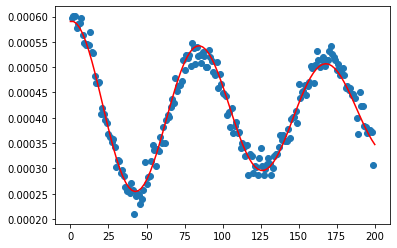

In [58]:
amp_array = data[0]

def rabi(x, p0, p1, p2, p3, p4):
    # A fit to Superconducting Qubit Rabi Oscillation
    #   Offset                       : p[0]
    #   Oscillation amplitude        : p[1]
    #   Period    T                  : 1/p[2]
    #   Phase                        : p[3]
    #   Arbitrary parameter T_2      : 1/p[4]
    #return p[0] + p[1] * np.sin(2 * np.pi / p[2] * x + p[3]) * np.exp(-x / p[4])
    r =  p0 + p1 * np.sin(-2 * np.pi * x * p2 + p3) * np.exp(- x * p4)
    return r

print(np.argmin(amp_array))
print(amp_array[np.argmin(amp_array)])
pguess = [
    np.mean(amp_array),
    max(amp_array) - min(amp_array),
    (1/2)/data[1,np.argmin(amp_array)], 
    np.pi/2,
    0.1e-6
]

#print(pguess)
popt, pcov = curve_fit(rabi, data[1], amp_array, p0=pguess) #[0,1,0.1,-np.pi/2,0.5])
pi_pulse_duration = (1.0 / popt[2]) / 2
t_2 = 1.0 / popt[4]
print(pi_pulse_duration, t_2, popt)

plt.scatter(data[1], data[0])
xx = np.linspace(0, 200, 100)
ypred = rabi(xx, *popt)
plt.plot(xx, ypred, 'r')

def mse(y, yd):
    return np.sum(np.square(y-yd))

print('MSE = ', mse(data[0], rabi(data[1], *popt)))